# 시계열 데이터 기초

## 1. `pd.to_datetime` 함수

In [1]:
# 필요 라이브러리 로딩
import pandas as pd # 판다스의 Datetimeindex를 사용할 것임
import numpy as np # random seed 및 난수 생성

In [2]:
# 아래와 같은 임의의 날짜 문자열로 생성
date = ["2020/01/01", "2020/02/01", "2020/03/01", "2020/04/01"] # 임의의 날짜 문자열이 있다고 가정
date_idx = pd.to_datetime(date) # 위 날짜 문자열을 --> DatetimeIndex(pandas 제공)로 바꾸고자 함 # idx: index

print(date_idx) # 속성 확인

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)


> DatetimeIndex를 어떻게 활용하느냐?
- 한번 dataframe 혹은 Series를 만들어보면서 확인해보자. 

In [3]:
# DatetimeIndex를 매핑할 값을 먼저 줘보려고 한다. 
np.random.seed(1) # numpy의 random을 활용한 난수를 한번 생성해보겠다 # 고정된 난수만 나오도록 시드 설정

# 3과 10 사이의 정수로 구성된 4개의 원소를 가진 넘파이 난수 배열 생성
random_int = np.random.randint(3, 10, size=4)
random_int

array([8, 6, 7, 3])

In [4]:
# 넘파이 배열 시리즈로 변환
series = pd.Series(random_int, index=date_idx)
series

2020-01-01    8
2020-02-01    6
2020-03-01    7
2020-04-01    3
dtype: int32

- date의 문자열이 'yyyy/mm/dd'의 형식이 아니더라도 대부분의 경우에서 `to_datetime` 함수를 사용할 수 있다. 

In [5]:
# 문자열의 형식의 'yyyy/mm/dd'가 아니어도 to_datetime 함수 활용이 가능함
# 예제 1) 마침표로 구분된 날짜
date = ["2020.01.01", "2020.02.01", "2020.03.01", "2020.04.01"] # 마침표로 구분하는 날짜 문자열

date_idx2 = pd.to_datetime(date)
date_idx2

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

In [6]:
# 예제 2) 콤마로 구분된 날짜
date = ["2020,01,01", "2020,02,01", "2020,03,01", "2020,04,01"] # 콤마로 구분하는 날짜 문자열

date_idx3 = pd.to_datetime(date)
date_idx3

C:\Users\user\AppData\Local\Temp\ipykernel_34676\1273669353.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_idx3 = pd.to_datetime(date)


DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01'], dtype='datetime64[ns]', freq=None)

In [7]:
# 예제 3) 띄어쓰기로 구분된 날짜
date = ["2020 01 01", "2020 02 01", "2020 03 01", "2020 04 01"] # 띄어쓰기로 구분하는 날짜 문자열

date_idx4 = pd.to_datetime(date)
date_idx4

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

## 2. `pd.date_range` 함수
- `pd.to_datetime`과 마찬가지로 이 함수를 통해서도 `DatetimeIndex`를 만들 수 있다.
- python의 numpy `range` 기능과 굉장히 흡사하다. --> 시작일과 끝을 정해주면, 아래처럼 굉장히 편리하게 `DatetimeIndex`를 만들 수 있다.

In [8]:
# date_range : 시작일과 기간을 인수로 설정
pd.date_range('2020-1-1', '2020-05-31') # 해당 기간 일별 데이터로 출력 # freq='D' : day(일)별 데이터임을 know!

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [9]:
# 일별 말고, 월별로 만들고 싶다. 
pd.date_range('2020-1-1', '2020-05-31', freq='M') # freq='M' : 월별 데이터로 생성 인수(각 월말일 기준)

C:\Users\user\AppData\Local\Temp\ipykernel_34676\1803402636.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range('2020-1-1', '2020-05-31', freq='M') # freq='M' : 월별 데이터로 생성 인수(각 월말일 기준)


DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='ME')

In [10]:
# 나는 월말도 싫고, 월초가 좋다!
pd.date_range('2020-1-1', '2020-05-31', freq='MS') # freq='MS' : 월별 각 첫일로 데이터 생성

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='MS')

> 많이 사용하는 인수 요약
- `D`: 일별(default값)
- `W`: 주별(일요일 기준)
- `W-MON`: 주별(월요일 기준)
- `M`: 월별(월의 마지막 날)
- `MS`: 월별(월의 첫째 날)
- `B`: 주말을 제외한 평일 인덱스(i.e. 토, 일 제외)

In [11]:
# 종료일 명시 x, periods를 대신 명시하는 방법도 있다
pd.date_range(start="2020-1-1", periods=45) # 일별 데이터로 리턴 # periods=45 : 45개의 데이터가 필요해!

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14'],
              dtype='datetime64[ns]', freq='D')

In [12]:
# period & freq 명시
pd.date_range(start="2020-1-1", periods=45, freq="MS") # freq="MS" : 각 월 첫

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01'],
              dtype='datetime64[ns]', freq='MS')

## 3. 시계열의 `shift`
- 데이터를 하나씩 이동하는 것을 의미한다. (이게 필요한 경우가 되게 많다.)
- ex. 금융, 주식 데이터를 쓴다면 (물론 시계열 데이터라 그 전의 데이터도 담고 있겠지만) 당일에 대해서 전날 거래량, 전날 가격, 이런 것을 한 행에 쉽게 포함을 시킬 수 있기 때문에
- 또 그런 것에 대한 정보가 시계열에서는 정상성 만족이라는 것을 위해서 차분을 해야할 때가 많기 때문
- 좀 헷갈릴 수 있겠지만 알아두고 가야 한다.

In [13]:
# 마찬가지로 난수를 만들 것이다. 
np.random.seed(1) # 고정된 난수만 출력하도록 시드 설정

arr = np.random.randn(12) # 가우시안 정규분포 확률을 따르는 난수 12개 생성

ts_idx = pd.date_range('2020-1-1', periods=12, freq='MS') # 해당 난수값의 날짜 인덱스 생성

# 날짜 인덱스와 어레이를 이용하여
ts = pd.Series(arr, index=ts_idx) # 시리즈 생성
ts

2020-01-01    1.624345
2020-02-01   -0.611756
2020-03-01   -0.528172
2020-04-01   -1.072969
2020-05-01    0.865408
2020-06-01   -2.301539
2020-07-01    1.744812
2020-08-01   -0.761207
2020-09-01    0.319039
2020-10-01   -0.249370
2020-11-01    1.462108
2020-12-01   -2.060141
Freq: MS, dtype: float64

In [14]:
# 1개월치 데이터가 고대로 다음달로 이동해 밀려나게 하려면?
ts.shift(1)

2020-01-01         NaN
2020-02-01    1.624345
2020-03-01   -0.611756
2020-04-01   -0.528172
2020-05-01   -1.072969
2020-06-01    0.865408
2020-07-01   -2.301539
2020-08-01    1.744812
2020-09-01   -0.761207
2020-10-01    0.319039
2020-11-01   -0.249370
2020-12-01    1.462108
Freq: MS, dtype: float64

In [15]:
# 4개월치 데이터 이동
ts.shift(4)

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01         NaN
2020-05-01    1.624345
2020-06-01   -0.611756
2020-07-01   -0.528172
2020-08-01   -1.072969
2020-09-01    0.865408
2020-10-01   -2.301539
2020-11-01    1.744812
2020-12-01   -0.761207
Freq: MS, dtype: float64

In [16]:
# 각 월 첫주 일요일을 기준으로 데이터 쉬프트
ts.shift(1, freq='W')

2020-01-05    1.624345
2020-02-02   -0.611756
2020-03-08   -0.528172
2020-04-05   -1.072969
2020-05-03    0.865408
2020-06-07   -2.301539
2020-07-05    1.744812
2020-08-02   -0.761207
2020-09-06    0.319039
2020-10-04   -0.249370
2020-11-08    1.462108
2020-12-06   -2.060141
dtype: float64

## 4. `diff(n)`: 행 -n기간전 행
- timeseriesindex의 연산자이다. 차분의 의미를 가진 연산자이다.
- diff 안에 n이라는 연산자가 들어간다면, 지금 현재 행에서 n기간 전 행을 차분한 값을 연산함

In [17]:
# 1개월치 차분 값 연산
ts.diff(1) # 차분 값 = 현재 달 - 1달 전 # 1월1일의 경우 2019년 12-01의 값이 없어서 결측처리

2020-01-01         NaN
2020-02-01   -2.236102
2020-03-01    0.083585
2020-04-01   -0.544797
2020-05-01    1.938376
2020-06-01   -3.166946
2020-07-01    4.046350
2020-08-01   -2.506019
2020-09-01    1.080246
2020-10-01   -0.568409
2020-11-01    1.711478
2020-12-01   -3.522249
Freq: MS, dtype: float64

In [18]:
# 연산 방식 # 헷갈린다면 아래처럼 계산해서 위 표와 비교하자!
ts[1] - ts[0] #

C:\Users\user\AppData\Local\Temp\ipykernel_34676\827130554.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[1] - ts[0] #


-2.236101777313317

In [19]:
# 3개월치 차분 값 연산
ts.diff(3) # 차분 값 = 현재 달 - 3달 전 

2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01   -2.697314
2020-05-01    1.477164
2020-06-01   -1.773367
2020-07-01    2.817780
2020-08-01   -1.626615
2020-09-01    2.620578
2020-10-01   -1.994182
2020-11-01    2.223315
2020-12-01   -2.379180
Freq: MS, dtype: float64

In [20]:
ts[3] - ts[0]

C:\Users\user\AppData\Local\Temp\ipykernel_34676\1300720565.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[3] - ts[0]


-2.697313985819412

## 5. `resample`
- 일별 데이터를 월별 데이터로 바꿀 때나, 또는 반대의 경우 사용

In [21]:
# resample를 위해 난수를 활
np.random.seed(1) # 고정된 난수 출력을 위해 시드 설정

arr = np.random.randn(365) # 365일치 난수 생성
time_idx = pd.date_range('2021-1-1', periods=365, freq='D') # 2021년 365일치 기간 생성

ts = pd.Series(arr, index=time_idx) # 1년치 시계열 데이터 생성
ts

2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
                ...   
2021-12-27   -0.557495
2021-12-28    0.939169
2021-12-29   -1.943323
2021-12-30    0.352494
2021-12-31   -0.236437
Freq: D, Length: 365, dtype: float64

### 5-1. down_sampling
- 필히 좀 알아두자! 실무에서도 자주 쓰인다.
- ex. 월별 평균 기온, 월별 평균 주가...

In [22]:
# 다운샘플링 예제
ts.resample('M').mean() # 일별 데이터를 월별로 변환

C:\Users\user\AppData\Local\Temp\ipykernel_34676\2709802239.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').mean() # 일별 데이터를 월별로 변환


2021-01-31   -0.080317
2021-02-28    0.075127
2021-03-31    0.186964
2021-04-30   -0.036879
2021-05-31    0.183157
2021-06-30    0.083610
2021-07-31    0.135417
2021-08-31    0.106348
2021-09-30    0.100417
2021-10-31   -0.057832
2021-11-30    0.255580
2021-12-31   -0.305686
Freq: ME, dtype: float64

### 5-2. up_sampling
- 사실 없는 데이터를 만들어내야 한다.
- ex. 1년치의 월별데이터가 있다고 한다면, 12개를 일별데이터(365개)로 바꾼다면?
- up-sampling은 forward filling이랑 backward filling으로 보간할 수 있음
- 그러나 실무에서 사용하기에는 좀 위험할 수 있다. 

In [23]:
# 업샘플링 예제
arr = np.random.randn(10) # 새로운 난수 10개 생성
time_idx = pd.date_range('2021-1-1', periods=10, freq='W') # 'W': 주별 데이터 10개 생성

ts = pd.Series(arr, index=time_idx)
ts # 7일 간격으로 데이터가 나타나는 것을 확인 가능!

2021-01-03    0.727813
2021-01-10    0.515074
2021-01-17   -2.782534
2021-01-24    0.584647
2021-01-31    0.324274
2021-02-07    0.021863
2021-02-14   -0.468674
2021-02-21    0.853281
2021-02-28   -0.413029
2021-03-07    1.834718
Freq: W-SUN, dtype: float64

In [24]:
# 이 주별 데이터를 더 많이 늘릴거다! "우리 일별 데이터로 바꿀래!"
# forward filling 방식
ts.resample('D').ffill().head(21) # 'D': day(일) # ffill: 각 기간의 첫일을 참고하여 결측값 보간

2021-01-03    0.727813
2021-01-04    0.727813
2021-01-05    0.727813
2021-01-06    0.727813
2021-01-07    0.727813
2021-01-08    0.727813
2021-01-09    0.727813
2021-01-10    0.515074
2021-01-11    0.515074
2021-01-12    0.515074
2021-01-13    0.515074
2021-01-14    0.515074
2021-01-15    0.515074
2021-01-16    0.515074
2021-01-17   -2.782534
2021-01-18   -2.782534
2021-01-19   -2.782534
2021-01-20   -2.782534
2021-01-21   -2.782534
2021-01-22   -2.782534
2021-01-23   -2.782534
Freq: D, dtype: float64

- 결과를 보면서 설명하자.
- 1월 3일 데이터는 동일하다. 그러나 만약 이게 업샘플링이 되었다면, 4일부터 9일까지, 11일부터 16일까지 결측 처리일 것
- 그러나 우리는 과거 데이터를 기반으로 미래 데이터를 보간하겠다.
- 1월 3일 데이터로 9일까지 했고, 10일 기준으로 일주일치 데이터를 보간한다.
- 이런 매커니즘을 끝까지, 새롭게 생성된 데이터 관리를 한다. 

In [25]:
# backward filling: 각 기간의 마지막 날을 참고하여 결측값 보간
ts.resample('D').bfill().head(21)

2021-01-03    0.727813
2021-01-04    0.515074
2021-01-05    0.515074
2021-01-06    0.515074
2021-01-07    0.515074
2021-01-08    0.515074
2021-01-09    0.515074
2021-01-10    0.515074
2021-01-11   -2.782534
2021-01-12   -2.782534
2021-01-13   -2.782534
2021-01-14   -2.782534
2021-01-15   -2.782534
2021-01-16   -2.782534
2021-01-17   -2.782534
2021-01-18    0.584647
2021-01-19    0.584647
2021-01-20    0.584647
2021-01-21    0.584647
2021-01-22    0.584647
2021-01-23    0.584647
Freq: D, dtype: float64

 - 1월 3일을 기준으로 데이터를 보간할 수 있는 값들은 데이터셋에 없다. --> 1월 3일은 데이터 그 자체가 되었다.
 - 그 뒤 일주일(4일~10일)은 1월 10일을 기준으로 결측치들이 보간된다. 

## 6. `시계열 데이터 시각화`

In [26]:
# 필요 데이터 사용
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # 그래프 상세 속성 설정

In [27]:
np.random.seed(1) # 난수 설정

ts_data = np.random.randn(365, 3) # (365; 3) 행렬의 난수 데이터를 생성
ts_idx = pd.date_range(start='2021-01-01', periods=365, freq='D') # 365개의 시계열 인덱스 생성

ts_df = pd.DataFrame(ts_data, index=ts_idx) # 시계열 데이터 프레임
ts_df.head()

,0,1,2
2021-01-01,1.624345,-0.611756,-0.528172
2021-01-02,-1.072969,0.865408,-2.301539
2021-01-03,1.744812,-0.761207,0.319039
2021-01-04,-0.249370,1.462108,-2.060141
2021-01-05,-0.322417,-0.384054,1.133769


In [28]:
# 컬럼 속성에 접근해서 이름을 변경해보자. 보기좋게!
ts_df.columns = ['X', 'Y', 'Z']

ts_df.head()

,X,Y,Z
2021-01-01,1.624345,-0.611756,-0.528172
2021-01-02,-1.072969,0.865408,-2.301539
2021-01-03,1.744812,-0.761207,0.319039
2021-01-04,-0.249370,1.462108,-2.060141
2021-01-05,-0.322417,-0.384054,1.133769


<Axes: >

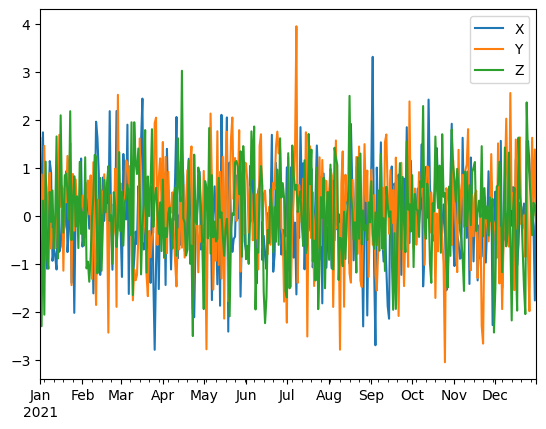

In [29]:
# 시도표를 그리는 방법은 pandas에서는 굉장히 간단하다. 
# Series든 dataframe이든, .plot()이라는 메소드만 활용하면 된다.
ts_df.plot() # 단순하게 데이터프레임의 메소드인 plot을 호출하면 됨

- 보기 좀 힘들다..
- 똑같이 정규분포를 가진 난수이기 때문에 이런식으로 겹쳐셔나왔다.

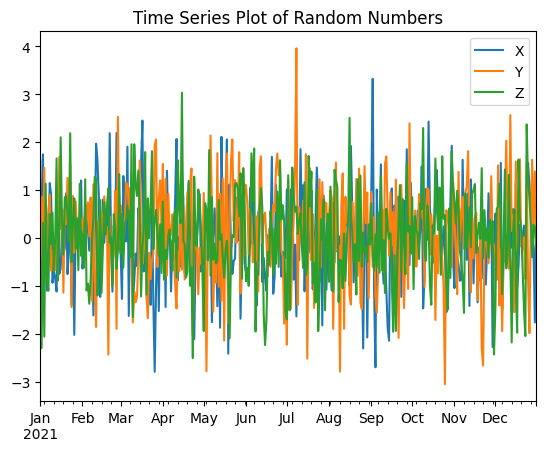

In [30]:
# plot의 타이틀을 주자!

ts_df.plot() # 단순하게 데이터프레임의 메소드인 plot을 호출하면 됨
plt.title('Time Series Plot of Random Numbers')
plt.show() # 그래프 출력용 커맨드는 붙여줘야 한다. 

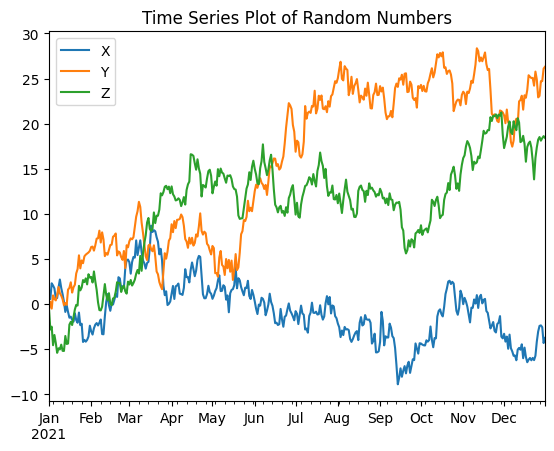

In [31]:
# 그래프를 알아보기 쉽게 바꿔보자.
# 누적합 함수를 이용해서 각 시리즈를 변경
ts_df = ts_df.cumsum() # .cumsum() : 누적합 메소드 --> 이를 통해 재설정
ts_df.plot()
plt.title('Time Series Plot of Random Numbers')
plt.show()

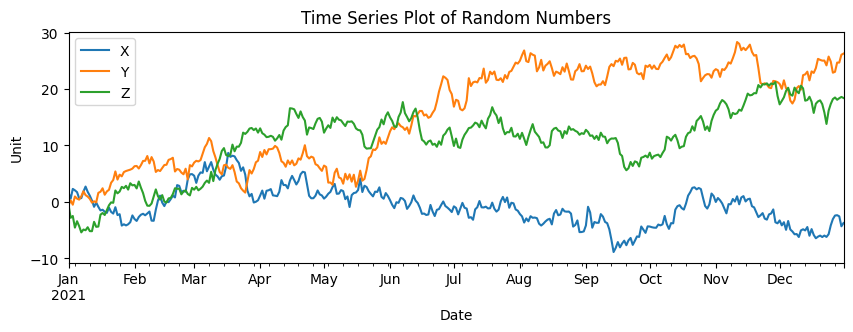

In [32]:
# 추가 그래프 설정 만지기
ts_df.plot(figsize=(10, 3)) # plot 그림의 크
plt.title('Time Series Plot of Random Numbers')
plt.xlabel('Date') # x축 이름 지정
plt.ylabel('Unit') # y축 이름 지정 
plt.show()

## ice cream 데이터셋 로딩

In [33]:
import pandas as pd
import numpy as np

# 날짜 범위 생성
date_range = pd.date_range('2008-01-31', '2021-12-31', freq='M')

# 데이터 리스트 초기화
data = []

# 각 날짜에 대해 year, month, date 및 sales_amount 생성
for date in date_range:
    data.append({
        'year': date.year,
        'month': date.strftime('%b'),  # 3자리 월 이름 (예: Jan)
        'date': date.day,
        'sales_amount': np.random.randint(1000, 100000)  # 1000에서 100000 사이의 난수
    })

# 데이터프레임 생성
ice_df = pd.DataFrame(data)

# 데이터프레임 출력
ice_df

C:\Users\user\AppData\Local\Temp\ipykernel_34676\3466135636.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range('2008-01-31', '2021-12-31', freq='M')


,year,month,date,sales_amount
0,2008,Jan,31,76317
1,2008,Feb,29,91252
2,2008,Mar,31,33254
3,2008,Apr,30,39224
4,2008,May,31,92744
...,...,...,...,...
163,2021,Aug,31,48062
164,2021,Sep,30,34575
165,2021,Oct,31,42287
166,2021,Nov,30,90986


In [34]:
ice_df.info() # null값 확인 # data type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          168 non-null    int64 
 1   month         168 non-null    object
 2   date          168 non-null    int64 
 3   sales_amount  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [35]:
ice_df.index # RangeIndex --> 0부터 167까지 쭉 증가하는 정수값을 가진 인덱스다. 

RangeIndex(start=0, stop=168, step=1)

- 그러나 우리는 이것을 datetimeindex로 바꿀 것이기 때문에 변환 과정을 거칠 것이다. 

In [36]:
# 정수값인 year의 값을 문자열(str)로 변경
ice_df['year'] = ice_df['year'].astype(str)

In [37]:
# 마찬가지로 month와 date의 값도 문자열로 변경
ice_df['month'] = ice_df['month'].astype(str)
ice_df['date'] = ice_df['date'].astype(str)

In [38]:
ice_df.info() # object : 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          168 non-null    object
 1   month         168 non-null    object
 2   date          168 non-null    object
 3   sales_amount  168 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.4+ KB


In [39]:
# 문자열은 서로 더하는 게 가능하다!
# 날짜 문자열 생성 --> 2020-01-01 --> 이런 식으로 표기할 예정!
date_str = ice_df['year'].values + '-' + ice_df['month'].values + '-' + ice_df['date'].values # 중간에 '-' 기호로 연, 월, 일의 값을 구분
date_str[:5] # 다섯개 출력
# value를 하면 array값으로 받기 때문에 array로 출력됨

array(['2008-Jan-31', '2008-Feb-29', '2008-Mar-31', '2008-Apr-30',
       '2008-May-31'], dtype=object)

In [40]:
# Datetime Index 생성
ice_idx = pd.to_datetime(date_str)
ice_idx

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq=None)

In [41]:
# 인덱스 값 변경
ice_df.index = ice_idx
ice_df

,year,month,date,sales_amount
2008-01-31,2008,Jan,31,76317
2008-02-29,2008,Feb,29,91252
2008-03-31,2008,Mar,31,33254
2008-04-30,2008,Apr,30,39224
2008-05-31,2008,May,31,92744
...,...,...,...,...
2021-08-31,2021,Aug,31,48062
2021-09-30,2021,Sep,30,34575
2021-10-31,2021,Oct,31,42287
2021-11-30,2021,Nov,30,90986


In [42]:
# 불필요한 컬럼 제거
ice_df.drop(['year', 'month', 'date'], axis=1, inplace=True)
ice_df # 이제 시계열 데이터만 남게 된다. 

,sales_amount
2008-01-31,76317
2008-02-29,91252
2008-03-31,33254
2008-04-30,39224
2008-05-31,92744
...,...
2021-08-31,48062
2021-09-30,34575
2021-10-31,42287
2021-11-30,90986


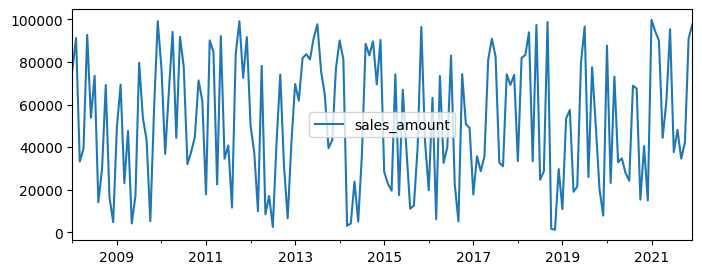

In [43]:
# 시도표(시계열 라인 그래프) 생성
ice_df.plot(figsize=(8, 3))
plt.show()